In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.colors import ListedColormap


from sklearn.linear_model import LinearRegression, LogisticRegression

%matplotlib inline

# Задачи на ML

Выведите формулу ML-оценки для дисперсии нормального распределения по выборке из него.
Можно вставить в дз фотографию, либо использовать Latex в самом ноутбуке. Либо скинуть в письме вместе с jupyter-notebook

Выведите формулу ML-оценки для оценки параметра лямбда распределения Пуассона по данной выборке из него

## Задачи на MAP-оценку

Выведите MAP-оценку для общего случая эксперимента с монетой. N бросков, выпало k орлов

Вероятность получить монету с такой-то вероятностью выпадения орла задается бета-распределением
с параметрами alpha и beta

 Исследуйте поведение полученной формулы в зависимости от соотношения числа бросков и alpha+beta, и соотношения alpha и beta. Можно ли получить ситуацию, при которой результаты опыта не влияют на наши выводы?

\* Обобщением beta-распределения является распределение Дирихле. Нам понадобится это распределение в качестве априорного, когда мы хотим, к примеру, оценить частоту нуклеотидов в данной позиции выравнивания. 

Выведите формулу MAP-оценки, по которой можно посчитать частоту каждого нуклеотида. Для решения вам понадобится знание метода множителей Лагранжа (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0)

Вы можете найти решение в книге Дурбин "Анализ биологических последовательностей"


# Линейная регрессия для классификации 

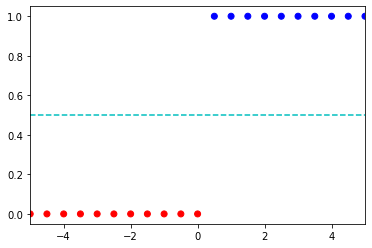

In [11]:
x = np.arange(-5, 6, 0.5)

# пусть если x больше 0 - то он в классе 1, иначе он в классе 0
y = x > 0

plt.xlim(-5, 5)
plt.hlines(0.5, -10, 10, linestyles='--', color='c')
plt.scatter(x, y, c=y, cmap=ListedColormap(['red', 'blue']) )

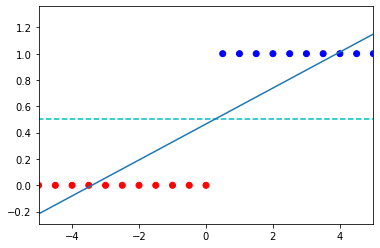

In [12]:
X = x.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

x_grid = np.arange(-5, 6, 0.01)
X_grid = x_grid.reshape(-1, 1)
y_grid = model.predict(X_grid)



plt.xlim(-5, 5)
plt.hlines(0.5, -10, 10, linestyles='--', color='c')
plt.scatter(x, y, c=y, cmap=ListedColormap(['red', 'blue']) )
plt.plot(x_grid, y_grid)

#### Какие проблемы вы видите в данном подходе? 

В задачи классификации нам нужно получать категориальные переменные, но так как мы изпользуем линейную регрессию то в этом случае у нас непрерывные значения.


### Сделайте вывод о применимости

Линейная регрессия плохо подходит для любой задачи классификации.

# Логистическая регрессия для классификации 

Попробуем теперь логистическую регрессию. 

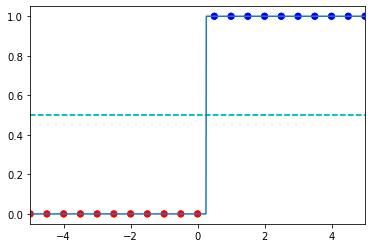

In [13]:
x = np.arange(-5, 6, 0.5)

# пусть если x больше 0 - то он в классе 1, иначе он в классе 0
y = x > 0

plt.xlim(-5, 5)
plt.hlines(0.5, -10, 10, linestyles='--', color='c')
plt.scatter(x, y, c=y, cmap=ListedColormap(['red', 'blue']))

X = x.reshape(-1, 1)
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)
x_grid = np.arange(-5, 6, 0.01)
X_grid = x_grid.reshape(-1, 1)
y_grid = model.predict(X_grid)


plt.xlim(-5, 5)
plt.hlines(0.5, -10, 10, linestyles='--', color='c')
plt.scatter(x, y, c=y, cmap=ListedColormap(['red', 'blue']) )
plt.plot(x_grid, y_grid)

#### Получили пороговую функцию. То, что и хотели. Однако логистическая регрессия на самом деле учит не пороговую функцию. А почему нельзя учить ее? 

Логистическая регрессия учит вероятностную модель принадлежности случайной величины к классу, обучение пороговой функции не дает такую модель в итоге получаем либо 0, либо 1. Хотя обучение пороговой функции в некотором смысле происходит с помощью максимизации функции правдоподобия, минимизируя отступы от сигмоиды, для задачи классификации эта штука хорошо подходит.

#### Постройте график функции, которую использует логистическая регрессия для одномерного случая

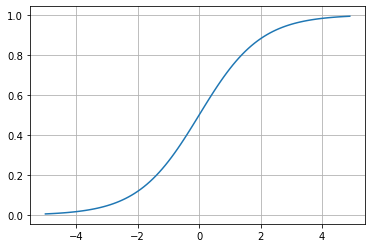

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

S_x = np.arange(-5, 5, 0.1)
S_y = sigmoid(S_x)
plt.grid()
plt.plot(S_x, S_y)

(1100, 2)


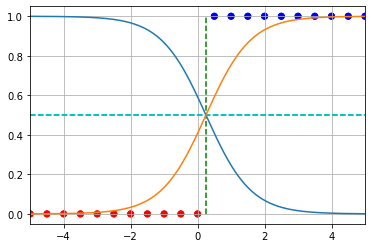

In [15]:
x = np.arange(-5, 6, 0.5)

# пусть если x больше 0 - то он в классе 1, иначе он в классе 0
y = x > 0

plt.xlim(-5, 5)
plt.hlines(0.5, -10, 10, linestyles='--', color='c')
plt.scatter(x, y, c=y, cmap=ListedColormap(['red', 'blue']))

X = x.reshape(-1, 1)
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)
x_grid = np.arange(-5, 6, 0.01)
X_grid = x_grid.reshape(-1, 1)
y_grid = model.predict_proba(X_grid) # predict probabilities instead of labels
print(y_grid.shape) # two columns for each object from X_grid
plt.grid()
plt.xlim(-5, 5)
plt.hlines(0.5, -10, 10, linestyles='--', color='c')
plt.scatter(x, y, c=y, cmap=ListedColormap(['red', 'blue']) )
plt.vlines(0.25, 0, 1, linestyles='dashed', color='g')
plt.plot(x_grid, y_grid)
plt.show()

##### Чему соответствуют две полученные на графике кривые линии? 

Эти линии показывают вероятность принадлежности точек к первому и второму классу.

#### Чему на ваш взгляд может соответствовать зеленая линия? 

Пороговой функции

### *Постройте график сигмоиды в многомерном случае (слайд 51)

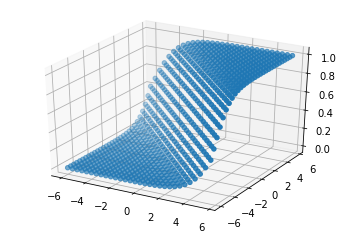

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = []
x2 = []
y = []

for i in range(-600, 600, 40):
    for j in range(-600, 600, 40):
        x1.append(i / 100)
        x2.append(j / 100)
        y.append(1 / (1 + np.exp(-i / 100 - j / 100)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', alpha = 0.1)
ax.scatter(x1, x2, y)

# Регуляризация


Чтобы использовать регуляризацию, необходимо использовать градиентный спуск, который мы обсудим на следующем занятии и который позволяет находить коэффициенты линейной регрессии в этом случае

Пример запуска без регуляризации

In [17]:
from sklearn.linear_model import SGDRegressor

In [18]:
def make_order_matrix(x, order): 
    # Делаем матрицу признаков. Каждой строке соответствует один объект, каждому столбцу - степень от 0 до order
    X = np.zeros((x.shape[0], order+1))
    X[:, 0] = 1
    X[:, 1] = x
    for i in range(2, order + 1):
        X[:, i] = x ** i
    return X 
    

In [19]:
def get_sin_sample(n=10, sigma=0.05, mean=0, xlim=(0,1), bins=None): # latin hypercube sampling
    if bins is None:
        bins = n
    
    step = (xlim[1] - xlim[0]) / bins
    k = int(np.ceil(n/bins))
    x = np.zeros(n)
    
    s = 0
    e = step
    pos = 0
    for i in range(0, bins):
        x[pos:pos+k] = np.random.uniform(s, e, k)
        s = e
        e += step
        pos += k
    
    last = n - bins
    if pos != n:
        x[pos:] = np.random.uniform(0, 1, n - pos)
    
    y = np.sin(2 * np.pi * x) 
    y_noised = y + np.random.normal(mean, sigma, n)
    return x, y_noised


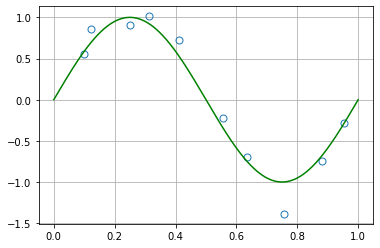

In [32]:
n = 10
sigma = 0.15
mean = 0
x, y = get_sin_sample(n=10, mean=mean, sigma=sigma)
eps = 0.01
xlim = (0, 1)
plt.grid()
plt.plot(x, y, marker='o', fillstyle='none', linestyle='none', markersize=7)
xsin = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0]) / 10000)
ysin = np.sin(2 * np.pi * xsin)
plt.plot(xsin, ysin, color='green')

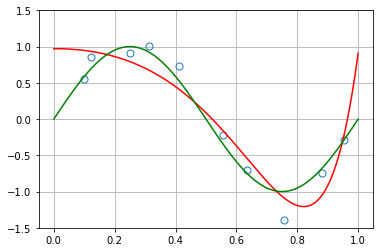

In [33]:
order = 10
model = SGDRegressor(fit_intercept=False, max_iter=100000, alpha=0, tol=1e-8) #

X= make_order_matrix(x, order)
model.fit(X, y)

X_grid = make_order_matrix(xsin, order)
y_grid_pred = model.predict(X_grid)

plt.ylim(-1.5, 1.5) 
plt.grid()
plt.plot(x, y, marker='o', fillstyle='none', linestyle='none', markersize=7)
plt.plot(xsin, y_grid_pred, color='red')
plt.plot(xsin, ysin, color='green')

In [22]:
# Модель только с l1-лоссом
model = SGDRegressor(fit_intercept=True, max_iter=100000, alpha=0.2, tol=1e-8, l1_ratio=1) 

In [23]:
# Модель только с l2-лоссом
model = SGDRegressor(fit_intercept=True, max_iter=100000, alpha=0.2, tol=1e-8, l1_ratio=0) 

#### Изучите влияние регуляризации (выберите один из двух лоссов) на точность аппроксимации модели. 

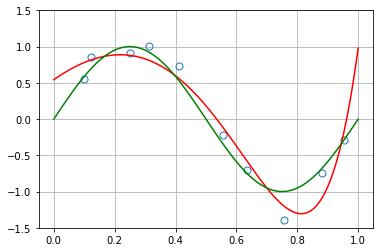

In [37]:
order = 10
model = SGDRegressor(fit_intercept=True, max_iter=10000000, alpha=0.00001, tol=1e-8, l1_ratio=0) 

X= make_order_matrix(x, order)
model.fit(X, y)

X_grid = make_order_matrix(xsin, order)
y_grid_pred = model.predict(X_grid)
plt.grid()
plt.ylim(-1.5, 1.5) # установить предел для оси OY
plt.plot(x, y, marker='o', fillstyle='none', linestyle='none', markersize=7)
plt.plot(xsin, y_grid_pred, color='red')
plt.plot(xsin, ysin, color='green')

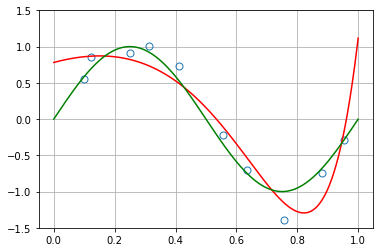

In [36]:
order = 10
model = SGDRegressor(fit_intercept=True, max_iter=10000000, alpha=0.00001, tol=1e-8, l1_ratio=1) 

X= make_order_matrix(x, order)
model.fit(X, y)

X_grid = make_order_matrix(xsin, order)
y_grid_pred = model.predict(X_grid)
plt.grid()
plt.ylim(-1.5, 1.5) # установить предел для оси OY
plt.plot(x, y, marker='o', fillstyle='none', linestyle='none', markersize=7)
plt.plot(xsin, y_grid_pred, color='red')
plt.plot(xsin, ysin, color='green')

#### Bias-variance tradeoff

Будем оценивать bias и variance модели по тренировочной выборке. 
Постройте график bias-variance tradeoff для l1-loss, меняем alpha от 0.0000001 до 1000 с логарифмическим шагом ([0.0000001, ....., 1000])

In [26]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split

In [27]:
x, y = get_sin_sample(n=200, mean=0, sigma=1)
order = 10
X= make_order_matrix(x, order)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=777)

In [28]:
from sklearn.exceptions import ConvergenceWarning

In [29]:
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [30]:
biases = []
variances = []
xrange = np.arange(0.0000001, 1000, 1)

for al in xrange:
    model = SGDRegressor(fit_intercept=True, 
                             max_iter=100000, 
                             alpha=al, 
                             tol=1e-8, 
                             l1_ratio=1)


    mse, bias, var = bias_variance_decomp(model, 
                                              X_train,
                                              y_train, 
                                              X_test, 
                                              y_test, 
                                              loss='mse', 
                                              num_rounds=200, 
                                              random_seed=777)
    biases.append([bias])
    variances.append([var])
    # summarize results
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

Bias: 1.742
Variance: 0.010


<function matplotlib.pyplot.show(*args, **kw)>

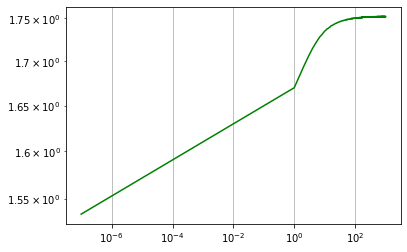

In [35]:
variances, biases = np.array(variances), np.array(biases)
yrange = variances + biases
plt.loglog(xrange, yrange, color='green')
plt.grid()
plt.show

# Изучение SGDRegressor*

Изучите любые три параметра SGDRegressor. Объясните смысл значений, которые они могут принимать. 
Типы  которые используется при обучении. Может принимать l2, l1,  elasticnet - есть взвешенная сумма L1 и L2 регулизационных членов.                                      
alpha - коэффициент регулизицации. Может быть любым действительным неотрицательным числом
l1_ratio - задает соотношение между степенями влияния L1 и L2 регулизации, в случае если penalty=elasticnet. Число от 0 (исключительно L2) до 1 (исключительно L1).

# Построение графика MSE*

Постройте график зависимости MSE от порядка модели для фиксированных значений других параметров. 
Также можно построить график зависимости MSE от двух параметров при помощи heatmap. 